<a href="https://colab.research.google.com/github/sipocz/messer/blob/main/nitrogen_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
#Nitrogén predikció
!rm /content/all.csv
!wget "https://github.com/sipocz/messer/raw/main/all.csv"
!head /content/all.csv

--2021-02-19 21:19:32--  https://github.com/sipocz/messer/raw/main/all.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sipocz/messer/main/all.csv [following]
--2021-02-19 21:19:32--  https://raw.githubusercontent.com/sipocz/messer/main/all.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6249032 (6.0M) [text/plain]
Saving to: ‘all.csv’

all.csv             100%[===================>]   5.96M  24.4MB/s    in 0.2s    

2021-02-19 21:19:33 (24.4 MB/s) - ‘all.csv’ saved [6249032/6249032]

timeStamp,LIN_V,LIN_P,PSA_M,PSA_P,PSA_Q
2019-11-21 09:58:15,32356.38,9.0,626.1,7.6,0.2749
2019-11-21 10:03

In [145]:
import numpy as np
import pandas as pd

In [146]:
_PCVERSION_=False
_GITHUB_ORIG=True

if _PCVERSION_:
    basedir="C:/Users/sipocz/OneDrive/Dokumentumok/GitHub/nitrogen"
else:
    from google.colab import drive
    drive.mount('/content/drive',force_remount=True)
    if _GITHUB_ORIG:
        basedir="/content/"
    else:
        basedir="/content/drive/My Drive/001_AI/messer/nitrogen/"
print(basedir)  


Mounted at /content/drive
/content/


In [147]:
df=pd.read_csv(basedir+"all.csv")
df.head

<bound method NDFrame.head of                   timeStamp    LIN_V  LIN_P  PSA_M  PSA_P  PSA_Q
0       2019-11-21 09:58:15 32356.38   9.00 626.10   7.60   0.27
1       2019-11-21 10:03:16 32346.85   9.00 663.10   7.70   0.28
2       2019-11-21 10:03:21 32347.00   8.59 663.10   7.70   0.28
3       2019-11-21 10:08:22 32350.00   8.61 548.90   7.70   0.27
4       2019-11-21 10:13:21 32327.00   8.62 492.50   7.70   0.27
...                     ...      ...    ...    ...    ...    ...
122418  2021-01-22 23:31:50 22143.00   8.41 593.70   7.80   0.24
122419  2021-01-22 23:36:50 22145.00   8.42 566.30   7.80   0.23
122420  2021-01-22 23:41:50 22142.00   8.42 510.00   7.80   0.23
122421  2021-01-22 23:46:50 22141.00   8.43 450.10   7.80   0.23
122422  2021-01-22 23:56:51 22139.00   8.43 554.10   7.80   0.23

[122423 rows x 6 columns]>

In [148]:
df["timeStamp"]=pd.to_datetime(df["timeStamp"],format="%Y.%m.%d %H:%M:%S")   # konvertáljuk az időbélyeget


d=df[["timeStamp","PSA_M"]]
d.set_index("timeStamp",inplace=True)

In [149]:
d.head()

,PSA_M
timeStamp,
2019-11-21 09:58:15,626.10
2019-11-21 10:03:16,663.10
2019-11-21 10:03:21,663.10
2019-11-21 10:08:22,548.90
2019-11-21 10:13:21,492.50


In [150]:
agg_10m = d.groupby([pd.Grouper(freq='D')])
resample_mean =  d.resample("60min").agg({'PSA_M': 'mean'})  # újramintázzuk a jeleket, pl órás átlagokkal számoljunk
resample_max =  d.resample("60min").agg({'PSA_M': 'max'})    # újramintázzuk a jeleket, pl órás maximumok
resample_min =  d.resample("60min").agg({'PSA_M': 'min'})    # újramintázzuk a jeleket, pl órás minimumok
o_df=pd.DataFrame({"Max":resample_max.PSA_M,"Min":resample_min.PSA_M, "Mean":resample_mean.PSA_M})


In [151]:
#vizualizáció
o_df.head()

,Max,Min,Mean
timeStamp,,,
2019-11-21 09:00:00,626.10,626.10,626.10
2019-11-21 10:00:00,723.90,492.50,621.43
2019-11-21 11:00:00,769.00,554.50,654.03
2019-11-21 12:00:00,764.60,578.80,685.52
2019-11-21 13:00:00,662.50,500.40,580.33


In [152]:
import plotly.express as px


fig = px.line(o_df,x=o_df.index, y=o_df.Mean, title='Nitrogén tömegáram [Órás átlagok]',range_y=(0,1500),)

fig.show()


In [153]:

import plotly.graph_objects as go


range1=0
range2=-1

fig = go.Figure([go.Scatter(x=o_df.index[range1:range2], y=o_df.Min,name="Min"),go.Scatter(x=o_df.index[range1:range2], y=o_df.Max, name="Max")])
fig.update_xaxes(
    dtick="M1",
    tickformat="'%d %B (%a)")
fig.update_yaxes(
    dtick="500")
fig.update_layout(  width=1900,  
                    title_text="Min Max Values",
                    )

fig.update_layout(yaxis_range=[0,1300])
fig.show()

In [154]:
o_df.notna()

,Max,Min,Mean
timeStamp,,,
2019-11-21 09:00:00,True,True,True
2019-11-21 10:00:00,True,True,True
2019-11-21 11:00:00,True,True,True
2019-11-21 12:00:00,True,True,True
2019-11-21 13:00:00,True,True,True
...,...,...,...
2021-01-22 19:00:00,True,True,True
2021-01-22 20:00:00,True,True,True
2021-01-22 21:00:00,True,True,True


In [155]:
print(f"{o_df['Min'].isnull().sum()} db NAN van a DF-ben" )
o_df.dropna(inplace=True)
print(f"{o_df['Min'].isnull().sum()} db NAN van a DF-ben" )


40 db NAN van a DF-ben
0 db NAN van a DF-ben


In [156]:
# Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

def ADF_test(timeseries, dataDesc):
    print(' {} ellenőrzése'.format(dataDesc))
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    print(dftest)
    print('Test statistic = {:.3f}'.format(dftest[0]))
    print('P-value = {:.3f}'.format(dftest[1]))
    print('Critical values :')
    for k, v in dftest[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))
    print("--------------------------------------------")

In [157]:
ADF_test(o_df.Min,'Minimum értékek')
ADF_test(o_df.Max,'Maximum értékek')
ADF_test(o_df.Mean,'Átlag értékek ')



 Minimum értékek ellenőrzése
(-4.582357689239793, 0.00013919459326058598, 6, 10240, {'1%': -3.430988763673373, '5%': -2.861822296275236, '10%': -2.5669202611637116}, 130543.60006367252)
Test statistic = -4.582
P-value = 0.000
Critical values :
	1%: -3.430988763673373 - The data is  stationary with 99% confidence
	5%: -2.861822296275236 - The data is  stationary with 95% confidence
	10%: -2.5669202611637116 - The data is  stationary with 90% confidence
--------------------------------------------
 Maximum értékek ellenőrzése
(-101.21758740456127, 0.0, 0, 10246, {'1%': -3.4309883895231814, '5%': -2.861822130940449, '10%': -2.566920173155941}, 795893.7975198245)
Test statistic = -101.218
P-value = 0.000
Critical values :
	1%: -3.4309883895231814 - The data is  stationary with 99% confidence
	5%: -2.861822130940449 - The data is  stationary with 95% confidence
	10%: -2.566920173155941 - The data is  stationary with 90% confidence
--------------------------------------------
 Átlag értékek 

In [158]:

start_pos = 2386 #@param {type:"slider", min:1000, max:5000, step:1}

weeknum =  9#@param {type:"integer"}

## 24 órás frekvencia?

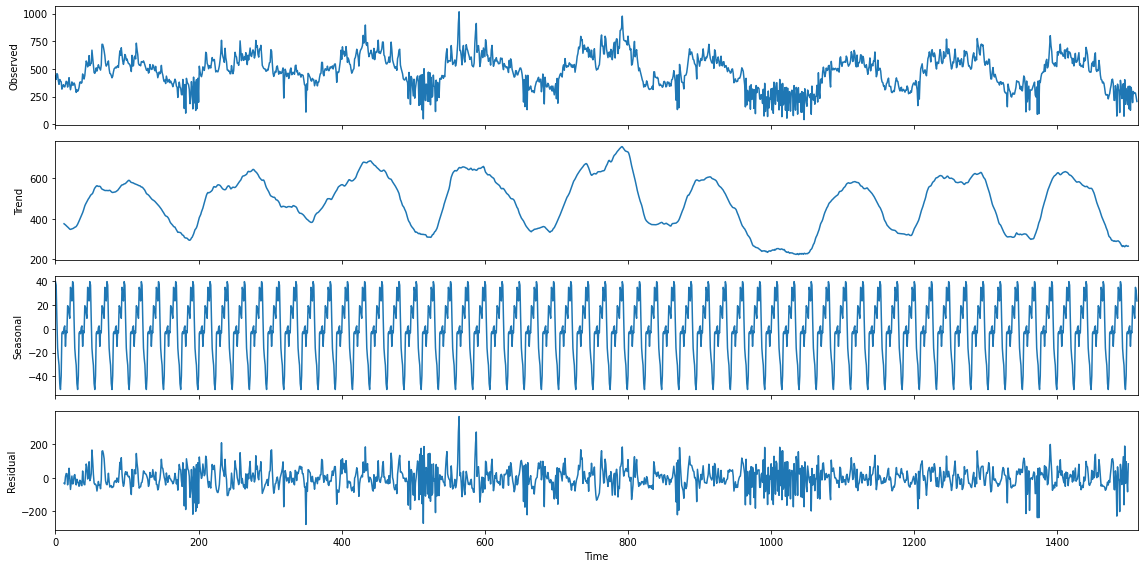

In [159]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure





plt.cla()
plt.close()

from statsmodels.tsa.seasonal import  seasonal_decompose

import matplotlib as mpl
with mpl.rc_context():
    mpl.rc("figure", figsize=(16,8))
    
    analysis = seasonal_decompose(o_df["Mean"][start_pos:start_pos+24*7*weeknum].values,model="additive", freq=24)
    #print(analysis.seasonal)
    analysis.plot()
    plt.show()

## Heti fekvencia ? 24*7 

In [160]:

start_pos = 3118 #@param {type:"slider", min:1000, max:5000, step:1}

weeknum =  12#@param {type:"integer"}

In [230]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


from statsmodels.tsa.seasonal import  seasonal_decompose

import matplotlib as mpl


In [231]:

start_pos = 1702 #@param {type:"slider", min:1000, max:5000, step:1}

weeknum =  12#@param {type:"integer"}

In [232]:
import plotly.express as px
from plotly.subplots import make_subplots

data1 = seasonal_decompose(o_df["Max"][start_pos:start_pos+24*7*weeknum].values,model="additive", freq=24*7)
  

fig2 = make_subplots(rows=4, cols=1,shared_xaxes=True)
fig2.add_trace(
    go.Scatter(x=o_df.index[start_pos:start_pos+24*7*weeknum], y=data1.resid,name="Residual" ),

    row=1, col=1
)
fig2.add_trace(
    go.Scatter( x=o_df.index[start_pos:start_pos+24*7*weeknum], y=data1.trend,name="Trend"),

    row=2, col=1
)
fig2.add_trace(
    go.Scatter( x=o_df.index[start_pos:start_pos+24*7*weeknum], y=data1.seasonal,name="Seasonal"),

    row=3, col=1
)

fig2.add_trace(
    go.Scatter( x=o_df.index[start_pos:start_pos+24*7*weeknum], y=data1.observed,name="Observed"),

    row=4, col=1
)



fig2.update_layout(
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
  
)

fig2.show()


print(o_df.index[start_pos])

2020-01-31 08:00:00


In [233]:
from statsmodels.tsa.stattools import pacf, acf 
oa,ob=pacf(o_df.Max[:25000], nlags=600, alpha=0.1,)


In [234]:
import plotly.express as px

xl=list(range(len(oa)))
fig = px.line(oa,x=xl, y=oa, title='Nitrogén tömegáram',range_y=(-1,1),)

fig.add_trace(
    go.Scatter(x=xl,
               y=ob[:,1],
               )
    

)
fig.add_trace(
    go.Scatter(x=xl,
               y=ob[:,0],
               )
    

)


fig.show()




The null hypothesis of the test is that there is no serial correlation in the residuals. The Durbin-Watson test statistic is defined as:

∑t=2T((et−et−1)2)/∑t=1Te2t
The test statistic is approximately equal to 2*(1-r) where r is the sample autocorrelation of the residuals. Thus, for r == 0, indicating no serial correlation, the test statistic equals 2. This statistic will always be between 0 and 4. The closer to 0 the statistic, the more evidence for positive serial correlation. The closer to 4, the more evidence for negative serial correlation.

In [166]:
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.stattools import adfuller
o1=durbin_watson(o_df.Min)
print(f"Durbin_Wattson elemzés eredménye: {o1}")
o2=adfuller(o_df.Mean)
print(f"ad_Fuller elemzés eredménye: {o2[1]},  nulla (0) ha nincs tendencia")

Durbin_Wattson elemzés eredménye: 0.02141501761290184
ad_Fuller elemzés eredménye: 0.0,  nulla (0) ha nincs tendencia


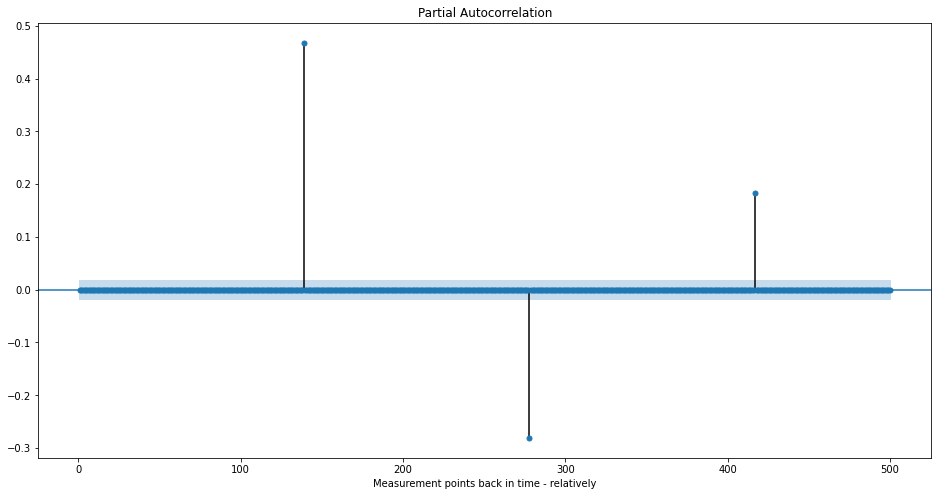

---


In [167]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig, ax = plt.subplots(figsize=(16,8))


plot_pacf(o_df.Max[:], lags=500, zero=False, ax=ax)
plt.xlabel("Measurement points back in time - relatively")

plt.show()
print("---")

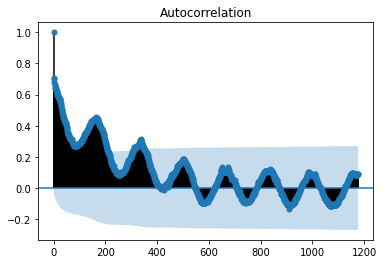

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
dta = o_df.Max[:5000]
dta.index = o_df.index[:5000]


sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=24*7*7)
plt.show()


In [235]:
#statsmodels.graphics.tsa
o_df

,Max,Min,Mean
timeStamp,,,
2019-11-21 09:00:00,626.10,626.10,626.10
2019-11-21 10:00:00,723.90,492.50,621.43
2019-11-21 11:00:00,769.00,554.50,654.03
2019-11-21 12:00:00,764.60,578.80,685.52
2019-11-21 13:00:00,662.50,500.40,580.33
...,...,...,...
2021-01-22 19:00:00,864.50,737.80,809.58
2021-01-22 20:00:00,882.90,767.70,832.27
2021-01-22 21:00:00,785.60,671.70,736.52


In [228]:
import plotly.express as px
fig = px.histogram(o_df, x=o_df["Max"],log_y=False)
fig.show()

In [171]:
#Outlier detektálás

In [174]:
from sklearn.cluster import DBSCAN
import numpy as np
X = o_df
print(type(X))
clustering = DBSCAN(eps=130, min_samples=1).fit(X)
print(clustering.labels_)



<class 'pandas.core.frame.DataFrame'>
[0 0 0 ... 0 0 0]


### Nézzünk egy histogramot az eloszlásról

In [215]:
import plotly.express as px
df=pd.DataFrame(clustering.labels_)

fig = px.histogram(df,x=df[0])
fig.show()


### Betyárúl néz ki !!

In [176]:
print (o_df.describe())

amax=df.max
o=[index for (index,i) in enumerate(clustering.labels_) if i>0]
print(clustering.labels_[o])
print(o_df.Max[o])


                         Max      Min                  Mean
count               10247.00 10247.00              10247.00
mean      283011054336405.38   444.20     56592529853849.47
std     20652409695535504.00   955.36   4268246866342296.00
min                     0.00     0.00                  0.00
25%                   492.30    88.90                294.65
50%                   573.60   336.90                459.99
75%                   646.80   467.85                566.36
max   1738198828336545792.00  6173.30 386269353275817984.00
[ 1  2  3  4  5  6  7  8  2  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9 

In [177]:
### Találtunk egypár outliert szedjük ki a dataframe-ből

In [178]:
print("Ezek lesznek az Outlierek")
print(o_df.Max[o])
print("\n\nAz eredeti Dataframe:\n",o_df.describe())
o_df_clear=o_df.drop(o_df.index[o])
print("\n\nA végleges Dataframe:\n",o_df_clear.describe())




Ezek lesznek az Outlierek
timeStamp
2019-12-24 10:00:00                   878.80
2020-01-20 12:00:00                  6174.30
2020-08-07 15:00:00   1161735877009866752.00
2020-08-08 12:00:00        26522809270272.00
2020-08-13 15:00:00   1738198828336545792.00
                               ...          
2020-11-19 10:00:00                  6172.30
2020-12-02 09:00:00                  1108.20
2020-12-10 09:00:00                  6156.30
2020-12-11 22:00:00        26522813464576.00
2021-01-15 06:00:00                  1216.00
Name: Max, Length: 279, dtype: float64


Az eredeti Dataframe:
                          Max      Min                  Mean
count               10247.00 10247.00              10247.00
mean      283011054336405.38   444.20     56592529853849.47
std     20652409695535504.00   955.36   4268246866342296.00
min                     0.00     0.00                  0.00
25%                   492.30    88.90                294.65
50%                   573.60   336.90        

### Sikerült kiszedni, nézzünk egy hisztogramot

In [212]:

df=pd.DataFrame(clustering.labels_)

fig = px.histogram(o_df_clear,x="Max",opacity=0.8,)
fig.show()


In [180]:
start_pos = 3529 #@param {type:"slider", min:1000, max:5000, step:1}

weeknum =  12#@param {type:"integer"}

In [181]:
import plotly.express as px
from plotly.subplots import make_subplots

data1 = seasonal_decompose(o_df_clear["Max"][start_pos:start_pos+24*7*weeknum].values,model="additive", freq=24*7)
  

fig2 = make_subplots(rows=4, cols=1,shared_xaxes=True)
fig2.add_trace(
    go.Scatter(x=o_df_clear.index[start_pos:start_pos+24*7*weeknum], y=data1.resid,name="Residual" ),

    row=1, col=1
)
fig2.add_trace(
    go.Scatter( x=o_df_clear.index[start_pos:start_pos+24*7*weeknum], y=data1.trend,name="Trend"),

    row=2, col=1
)
fig2.add_trace(
    go.Scatter( x=o_df_clear.index[start_pos:start_pos+24*7*weeknum], y=data1.seasonal,name="Seasonal"),

    row=3, col=1
)

fig2.add_trace(
    go.Scatter( x=o_df_clear.index[start_pos:start_pos+24*7*weeknum], y=data1.observed,name="Observed"),

    row=4, col=1
)



fig2.update_layout(
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
  
)

fig2.show()


print(o_df_clear.index[start_pos])

2020-04-17 15:00:00


In [182]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(o_df_clear, test_size=0.2, shuffle=False)


In [183]:
sample=10
X_train=[]
y_train=[]
X_test=[]
y_test=[]

for t in range(len(list(train_data.Mean))-sample):
    a=list(train_data.Mean[t:t+sample])
    
    #print(a)
    X_train.append(a[0:sample-1])
    #print(a)
    y_train.append([a[-1]])

for t in range(len(list(test_data.Mean))-sample):
    a=list(test_data.Mean[t:t+sample])
    X_test.append(a[0:sample-1])
    y_test.append([a[-1]])


### csináljunk egy ellenőrzést a X_train és y_train adatairól

In [184]:
for i in range(10):
    print(X_train[i], y_train[i])


[626.1, 621.4307692307693, 654.0333333333332, 685.525, 580.3333333333334, 647.4416666666666, 548.2166666666666, 537.475, 539.9499999999999] [586.7166666666668]
[621.4307692307693, 654.0333333333332, 685.525, 580.3333333333334, 647.4416666666666, 548.2166666666666, 537.475, 539.9499999999999, 586.7166666666668] [629.5416666666666]
[654.0333333333332, 685.525, 580.3333333333334, 647.4416666666666, 548.2166666666666, 537.475, 539.9499999999999, 586.7166666666668, 629.5416666666666] [637.9333333333334]
[685.525, 580.3333333333334, 647.4416666666666, 548.2166666666666, 537.475, 539.9499999999999, 586.7166666666668, 629.5416666666666, 637.9333333333334] [618.1166666666664]
[580.3333333333334, 647.4416666666666, 548.2166666666666, 537.475, 539.9499999999999, 586.7166666666668, 629.5416666666666, 637.9333333333334, 618.1166666666664] [631.2166666666668]
[647.4416666666666, 548.2166666666666, 537.475, 539.9499999999999, 586.7166666666668, 629.5416666666666, 637.9333333333334, 618.1166666666664,

### Ez jónak tűnik!!!

In [185]:
!pip install lazypredict  # Lazypredict egy gyors tesztlehetőséget ad, és semmit sem kell csinálni!!!!

In [186]:
from lazypredict.Supervised import LazyRegressor

In [187]:
regressor = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
rego=regressor.fit(pd.DataFrame(X_train),pd.DataFrame(X_test),pd.DataFrame(y_train),pd.DataFrame(y_test))

 21%|██▏       | 9/42 [00:04<00:18,  1.77it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


100%|██████████| 42/42 [01:13<00:00,  1.75s/it]


In [188]:
print(rego)

(                               Adjusted R-Squared  ...  Time Taken
Model                                              ...            
GradientBoostingRegressor                    0.92  ...        2.73
MLPRegressor                                 0.92  ...       14.25
ExtraTreesRegressor                          0.92  ...        2.29
HistGradientBoostingRegressor                0.92  ...        0.63
RandomForestRegressor                        0.92  ...        7.51
LGBMRegressor                                0.92  ...        0.32
BaggingRegressor                             0.91  ...        0.90
XGBRegressor                                 0.91  ...        1.20
AdaBoostRegressor                            0.91  ...        0.88
HuberRegressor                               0.91  ...        0.15
LinearSVR                                    0.91  ...        0.04
LassoLarsIC                                  0.91  ...        0.03
SGDRegressor                                 0.91  ...       

### MLP regressor nyert, ezt egy neuralis network alapú cucc, ne ezzel próbáljuk először.
###Legyen pl.: GradientBoostingRegressor


In [193]:
# from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
regressor=GradientBoostingRegressor(learning_rate=0.5,n_estimators=3000,verbose=1)
regressor.fit(X_train,y_train)
prediction=regressor.predict(X_test)

      Iter       Train Loss   Remaining Time 
         1       12366.5968            1.35m
         2        6190.8757            1.32m
         3        4449.9520            1.31m
         4        3898.0820            1.31m
         5        3699.1792            1.32m
         6        3613.9787            1.31m
         7        3562.8743            1.32m
         8        3496.6669            1.33m
         9        3433.1664            1.33m
        10        3352.5371            1.33m
        20        3163.9564            1.34m
        30        2952.1756            1.33m
        40        2800.4120            1.33m
        50        2663.6998            1.32m
        60        2570.1737            1.32m
        70        2440.3996            1.31m
        80        2343.1508            1.31m
        90        2241.6058            1.31m
       100        2177.5352            1.30m
       200        1519.8018            1.25m
       300        1115.0452            1.20m
       40

In [194]:
x_=[i for i in range(0,len(prediction))]

In [205]:
import plotly.express as px
from plotly.subplots import make_subplots

  

fig2 = make_subplots(rows=1, cols=1,shared_xaxes=True)


fig2.add_trace(
    go.Scatter(x=x_, y=pd.DataFrame(y_test)[0],name="Testvalues" ),

    row=1, col=1
)

fig2.add_trace(
    go.Scatter(x=x_, y=prediction,name="Prediction",fill="none",opacity=0.5),

    row=1, col=1
    
)



fig2.show()
